In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
# Load the dataset
music = pd.read_csv("music_spotify.csv")

# Check the structure of the dataset
print(music.info())

# Display the first few entries
print(music.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [33]:
# Check for rows with negative values
music[music['acousticness'] < 0.0]
music[music['energy'] < 0.0]

,X,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist


In [34]:
print(music['acousticness'].min(), music['acousticness'].max())
print(music['energy'].min(), music['energy'].max())

2.84e-06 0.995
0.0148 0.998


In [35]:
music['acousticness'] = music['acousticness'].clip(lower=0.0)
music['energy'] = music['energy'].clip(lower=0.0)

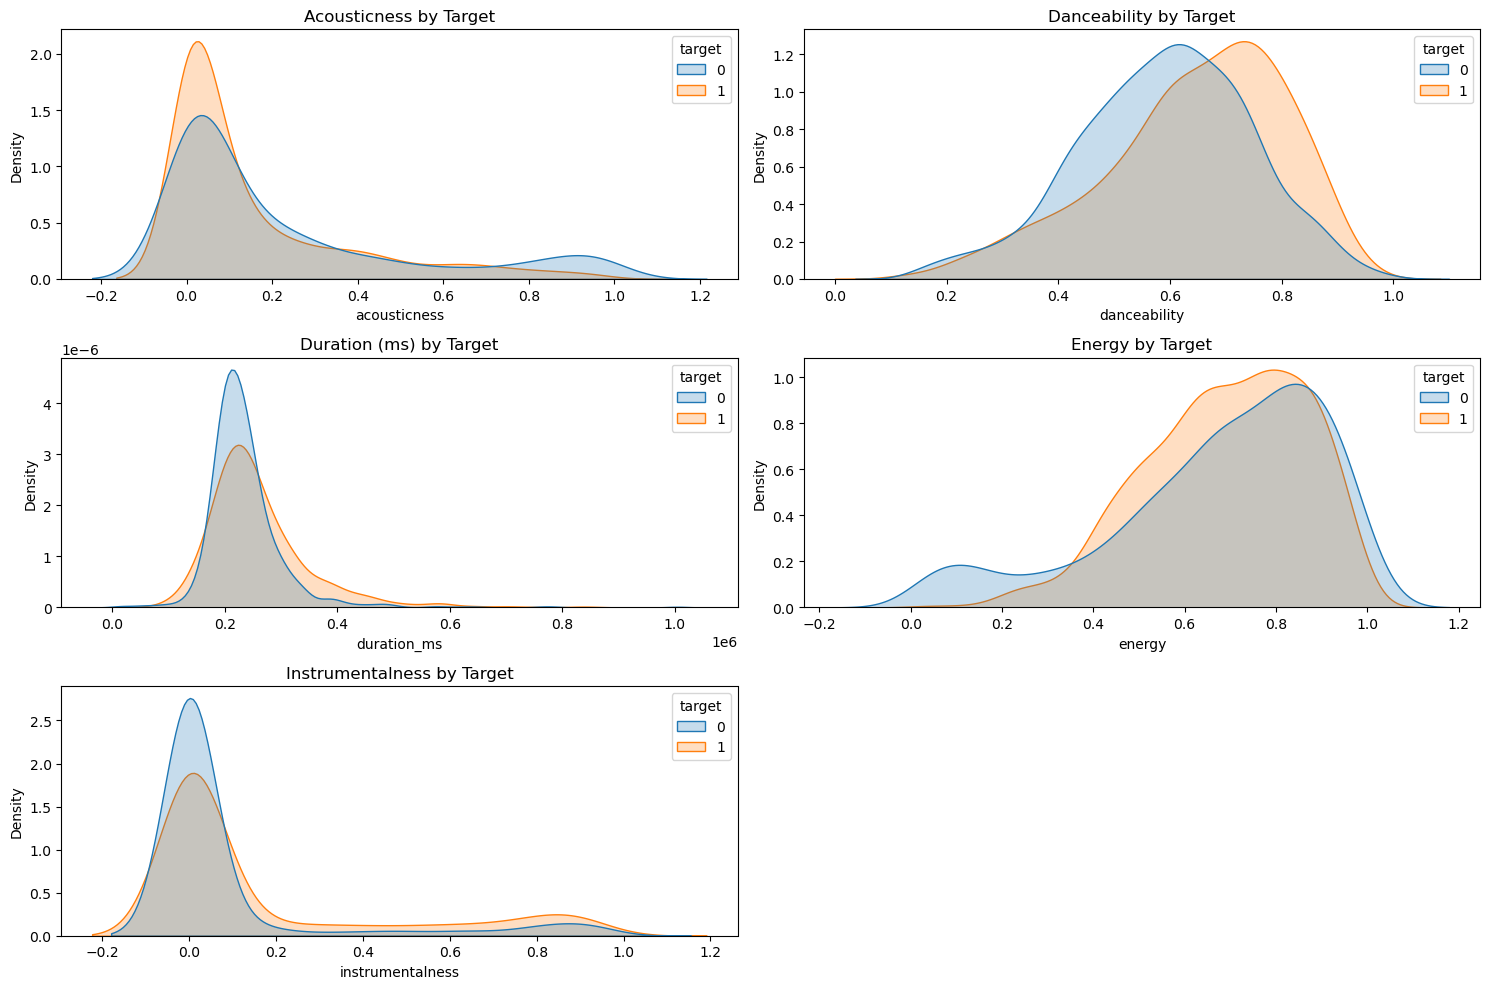

In [36]:
# Change target to category
music['target'] = music['target'].astype('category')
# Set up the plotting environment
plt.figure(figsize=(15, 10))
# Density plots for selected variables
plt.subplot(3, 2, 1)
sns.kdeplot(data=music, x='acousticness', hue='target', fill=True)
plt.title('Acousticness by Target')
plt.subplot(3, 2, 2)
sns.kdeplot(data=music, x='danceability', hue='target', fill=True)
plt.title('Danceability by Target')
plt.subplot(3, 2, 3)
sns.kdeplot(data=music, x='duration_ms', hue='target', fill=True)
plt.title('Duration (ms) by Target')
plt.subplot(3, 2, 4)
sns.kdeplot(data=music, x='energy', hue='target', fill=True)
plt.title('Energy by Target')
plt.subplot(3, 2, 5)
sns.kdeplot(data=music, x='instrumentalness', hue='target', fill=True)
plt.title('Instrumentalness by Target')
plt.tight_layout()
plt.show()

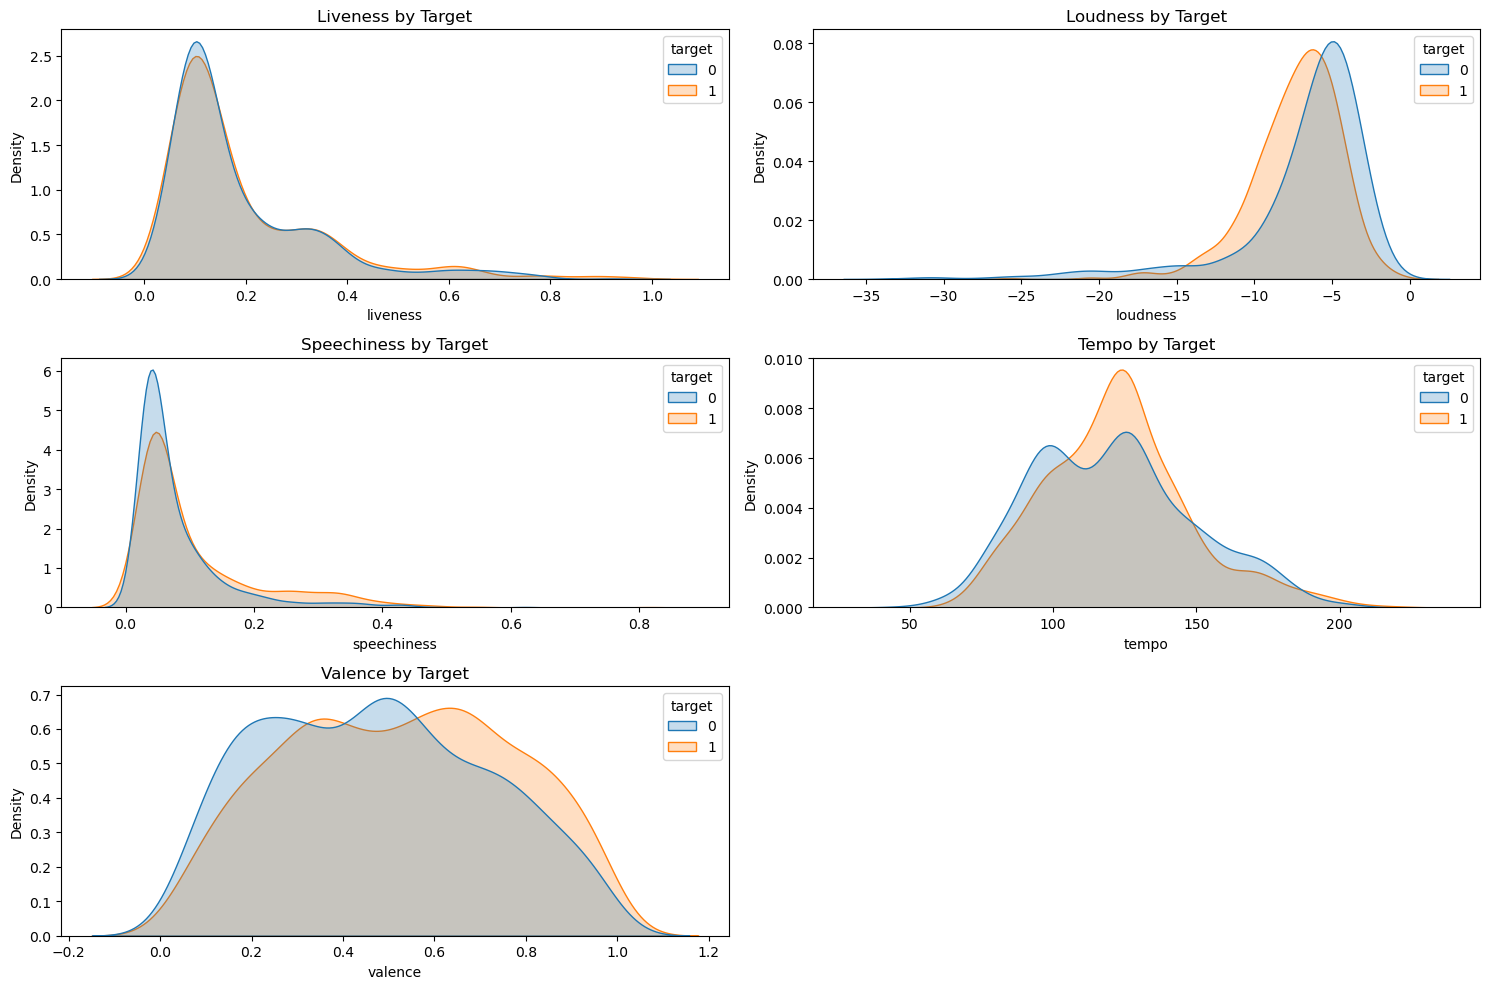

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.kdeplot(data=music, x='liveness', hue='target', fill=True)
plt.title('Liveness by Target')
plt.subplot(3, 2, 2)
sns.kdeplot(data=music, x='loudness', hue='target', fill=True)
plt.title('Loudness by Target')
plt.subplot(3, 2, 3)
sns.kdeplot(data=music, x='speechiness', hue='target', fill=True)
plt.title('Speechiness by Target')
plt.subplot(3, 2, 4)
sns.kdeplot(data=music, x='tempo', hue='target', fill=True)
plt.title('Tempo by Target')
plt.subplot(3, 2, 5)
sns.kdeplot(data=music, x='valence', hue='target', fill=True)
plt.title('Valence by Target')
plt.tight_layout()
plt.show()

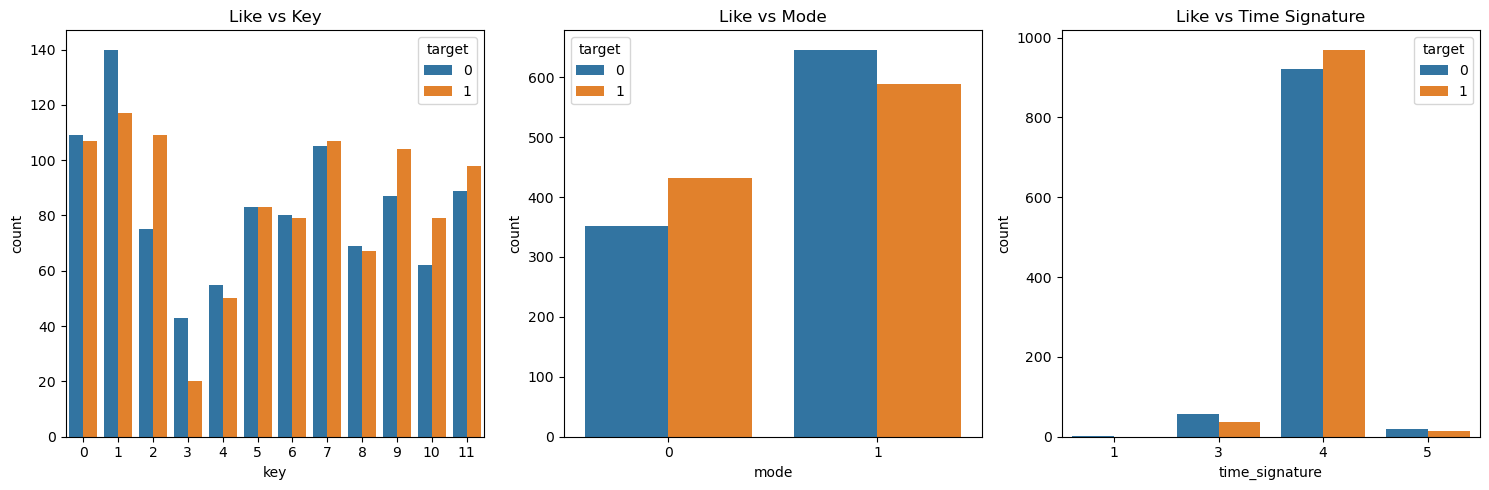

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=music, x='key', hue='target')
plt.title('Like vs Key')
plt.subplot(1, 3, 2)
sns.countplot(data=music, x='mode', hue='target')
plt.title('Like vs Mode')
plt.subplot(1, 3, 3)
sns.countplot(data=music, x='time_signature', hue='target')
plt.title('Like vs Time Signature')
plt.tight_layout()
plt.show()

In [40]:

# Split data into training and testing sets (80% training, 20% testing)
X = music.drop(columns=['target', 'song_title', 'artist', 'X'])  # Drop non-feature columns
y = music['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
# Extract the model coefficients (w) and intercept (b)
coefficients = model.coef_[0]  # Coefficients for each feature
intercept = model.intercept_[0]  # Intercept
# Get the feature names
features = X.columns
# Create the logistic regression equation
equation = f"Logit(p) = {intercept:.4f} "
equation += " + ".join([f"{coeff:.4f}*{feature}" for coeff, feature in zip(coefficients, features)])
print("\nLogistic Regression Equation:")
print(equation)


Confusion Matrix:
 [[123  77]
 [ 72 132]]
Accuracy: 0.6311881188118812

Logistic Regression Equation:
Logit(p) = -0.4418 -1.8485*acousticness + 1.2543*danceability + 0.0000*duration_ms + 0.4580*energy + 1.3238*instrumentalness + 0.0056*key + 0.4270*liveness + -0.1122*loudness + -0.2091*mode + 0.9243*speechiness + 0.0007*tempo + -0.6384*time_signature + 1.2321*valence


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Function to calculate accuracy for different thresholds
def evaluate_thresholds(y_true, y_probs, thresholds):
    results = {}
    for threshold in thresholds:
        y_pred_threshold = (y_probs >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred_threshold)
        results[threshold] = acc
    return results

thresholds = [0.3, 0.4, 0.5]
accuracy_results = evaluate_thresholds(y_test, y_probs, thresholds)

print("Accuracy Results at Different Thresholds:", accuracy_results)


Accuracy Results at Different Thresholds: {0.3: 0.5445544554455446, 0.4: 0.5841584158415841, 0.5: 0.6311881188118812}


In [42]:
# Drop the weak feature (time_signature) and create a new dataset
X_reduced = X.drop(columns=['time_signature'])

# Split the data again into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, stratify=y, random_state=123)

# Create and fit the logistic regression model with reduced features
model_reduced = LogisticRegression(max_iter=1000)
model_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Confusion matrix and accuracy
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

# Print results
print("Reduced Model Confusion Matrix:\n", conf_matrix_reduced)
print("Reduced Model Accuracy:", accuracy_reduced)


Reduced Model Confusion Matrix:
 [[132  68]
 [ 76 128]]
Reduced Model Accuracy: 0.6435643564356436


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Example transformation: log transformation on 'energy'

X_train['log_energy'] = np.log(X_train['energy'] + 1)
X_test['log_energy'] = np.log(X_test['energy'] + 1)

# Fit model with transformed feature
transformed_model = LogisticRegression(max_iter=1000)
transformed_model.fit(X_train, y_train)

# Predictions and accuracy
y_probs_transformed = transformed_model.predict_proba(X_test)[:, 1]
transformed_accuracy = evaluate_thresholds(y_test, y_probs_transformed, thresholds)

print("Transformed Model Accuracy at Different Thresholds:", transformed_accuracy)


Transformed Model Accuracy at Different Thresholds: {0.3: 0.5346534653465347, 0.4: 0.5792079207920792, 0.5: 0.6262376237623762}


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Function to evaluate accuracy at different thresholds
def evaluate_thresholds(y_true, y_probs, thresholds):
    accuracy = {}
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy[threshold] = accuracy_score(y_true, y_pred)
    return accuracy

# Define the transformations
def apply_transformations(X_train, X_test):
    # Log transform on 'energy' (other features remain unchanged)
    X_train_transformed_log = X_train.copy()
    X_test_transformed_log = X_test.copy()
    X_train_transformed_log['energy'] = np.log(X_train['energy'] + 1)
    X_test_transformed_log['energy'] = np.log(X_test['energy'] + 1)

    # Square root transform on 'acousticness' (other features remain unchanged)
    X_train_transformed_sqrt = X_train.copy()
    X_test_transformed_sqrt = X_test.copy()
    X_train_transformed_sqrt['acousticness'] = np.sqrt(X_train['acousticness'])
    X_test_transformed_sqrt['acousticness'] = np.sqrt(X_test['acousticness'])

    # Square transform on 'danceability' (other features remain unchanged)
    X_train_transformed_sq = X_train.copy()
    X_test_transformed_sq = X_test.copy()
    X_train_transformed_sq['danceability'] = X_train['danceability'] ** 2
    X_test_transformed_sq['danceability'] = X_test['danceability'] ** 2

    return X_train_transformed_log, X_test_transformed_log, \
           X_train_transformed_sqrt, X_test_transformed_sqrt, \
           X_train_transformed_sq, X_test_transformed_sq

# Example application of transformations
X_train_transformed_log, X_test_transformed_log, \
X_train_transformed_sqrt, X_test_transformed_sqrt, \
X_train_transformed_sq, X_test_transformed_sq = apply_transformations(X_train, X_test)

# Train logistic regression model for each transformation
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_transformed_log, y_train)
y_probs_log = model_log.predict_proba(X_test_transformed_log)[:, 1]
thresholds = [0.3, 0.5, 0.7]
accuracy_log = evaluate_thresholds(y_test, y_probs_log, thresholds)

model_sqrt = LogisticRegression(max_iter=1000)
model_sqrt.fit(X_train_transformed_sqrt, y_train)
y_probs_sqrt = model_sqrt.predict_proba(X_test_transformed_sqrt)[:, 1]
accuracy_sqrt = evaluate_thresholds(y_test, y_probs_sqrt, thresholds)

model_sq = LogisticRegression(max_iter=1000)
model_sq.fit(X_train_transformed_sq, y_train)
y_probs_sq = model_sq.predict_proba(X_test_transformed_sq)[:, 1]
accuracy_sq = evaluate_thresholds(y_test, y_probs_sq, thresholds)

# Print the results
print("Log Transformation (energy) Accuracy at Different Thresholds:", accuracy_log)
print("Square Root Transformation (acousticness) Accuracy at Different Thresholds:", accuracy_sqrt)
print("Square Transformation (danceability) Accuracy at Different Thresholds:", accuracy_sq)


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Log Transformation (energy) Accuracy at Different Thresholds: {0.3: 0.5198019801980198, 0.5: 0.6361386138613861, 0.7: 0.6064356435643564}
Square Root Transformation (acousticness) Accuracy at Different Thresholds: {0.3: 0.5247524752475248, 0.5: 0.6311881188118812, 0.7: 0.5891089108910891}
Square Transformation (danceability) Accuracy at Different Thresholds: {0.3: 0.5222772277227723, 0.5: 0.6311881188118812, 0.7: 0.5891089108910891}


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Function to evaluate accuracy at different thresholds
def evaluate_thresholds(y_true, y_probs, thresholds):
    accuracy = {}
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy[threshold] = accuracy_score(y_true, y_pred)
    return accuracy

# Define the transformations
def apply_transformations(X_train, X_test):
    # Log transform on 'valence' (other features remain unchanged)
    X_train_transformed_log = X_train.copy()
    X_test_transformed_log = X_test.copy()
    X_train_transformed_log['valence'] = np.log(X_train['valence'] + 1)
    X_test_transformed_log['valence'] = np.log(X_test['valence'] + 1)

    # Square root transform on 'speechiness' (other features remain unchanged)
    X_train_transformed_sqrt = X_train.copy()
    X_test_transformed_sqrt = X_test.copy()
    X_train_transformed_sqrt['speechiness'] = np.sqrt(X_train['speechiness'])
    X_test_transformed_sqrt['speechiness'] = np.sqrt(X_test['speechiness'])

    # Square transform on 'loudness' (other features remain unchanged)
    X_train_transformed_sq = X_train.copy()
    X_test_transformed_sq = X_test.copy()
    X_train_transformed_sq['loudness'] = X_train['loudness'] ** 2
    X_test_transformed_sq['loudness'] = X_test['loudness'] ** 2

    return X_train_transformed_log, X_test_transformed_log, \
           X_train_transformed_sqrt, X_test_transformed_sqrt, \
           X_train_transformed_sq, X_test_transformed_sq

# Example application of transformations
X_train_transformed_log, X_test_transformed_log, \
X_train_transformed_sqrt, X_test_transformed_sqrt, \
X_train_transformed_sq, X_test_transformed_sq = apply_transformations(X_train, X_test)

# Train logistic regression model for each transformation
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_transformed_log, y_train)
y_probs_log = model_log.predict_proba(X_test_transformed_log)[:, 1]
thresholds = [0.3, 0.5, 0.7]
accuracy_log = evaluate_thresholds(y_test, y_probs_log, thresholds)

model_sqrt = LogisticRegression(max_iter=1000)
model_sqrt.fit(X_train_transformed_sqrt, y_train)
y_probs_sqrt = model_sqrt.predict_proba(X_test_transformed_sqrt)[:, 1]
accuracy_sqrt = evaluate_thresholds(y_test, y_probs_sqrt, thresholds)

model_sq = LogisticRegression(max_iter=1000)
model_sq.fit(X_train_transformed_sq, y_train)
y_probs_sq = model_sq.predict_proba(X_test_transformed_sq)[:, 1]
accuracy_sq = evaluate_thresholds(y_test, y_probs_sq, thresholds)

# Print the results
print("Log Transformation (valence) Accuracy at Different Thresholds:", accuracy_log)
print("Square Root Transformation (speechiness) Accuracy at Different Thresholds:", accuracy_sqrt)
print("Square Transformation (loudness) Accuracy at Different Thresholds:", accuracy_sq)


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Log Transformation (valence) Accuracy at Different Thresholds: {0.3: 0.5371287128712872, 0.5: 0.6435643564356436, 0.7: 0.6113861386138614}
Square Root Transformation (speechiness) Accuracy at Different Thresholds: {0.3: 0.5346534653465347, 0.5: 0.6386138613861386, 0.7: 0.6039603960396039}
Square Transformation (loudness) Accuracy at Different Thresholds: {0.3: 0.5272277227722773, 0.5: 0.6287128712871287, 0.7: 0.5915841584158416}


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
